# Tabla Y4-125

In [1]:
#!pip install specdal spectrum


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


Extraer datos

In [40]:
import os
from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

datadir = "./Espectros_FORS_2/Y4"
archivos = list()
specs = list()
specs_df = list()
etiquetas = ['A1','A2','A3','A4','A5',
             'B1','B2','B3','B4','B5',
             'C1','C2','C3','C4','C5',
             'D1','D2','D3','D4','D5',
             'E1','E2','E3','E4','E5',
            ]
features = []

for f in os.listdir(datadir):
    title =str(f)[8:-8]
    archivos.append(f)
archivos.sort()

In [41]:
for f in archivos:
    data = pd.read_csv(datadir+"/"+f,delimiter='\t')
    title =str(f)[:-4]
    dev_x = data['Wavelength']
    dev_y = data[title]
    df = pd.DataFrame({'x': dev_x, 'y': dev_y})
    specs_df.append(df)
    tmp_arr = df.to_numpy()
    specs.append(tmp_arr)

    tmp = np.array(dev_y)
    features.append(tmp)
print(len(specs))
print(len(specs_df))
len(features)

125
125


125

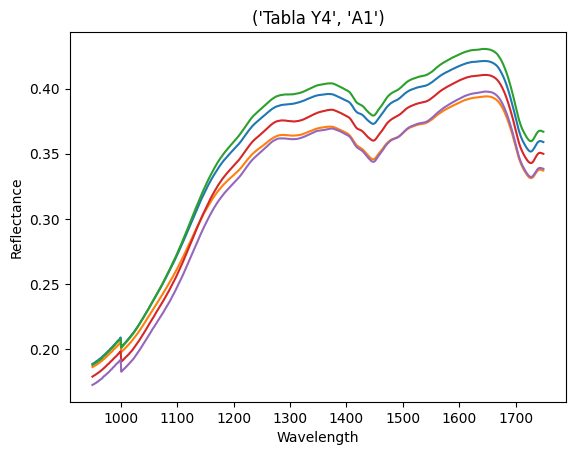

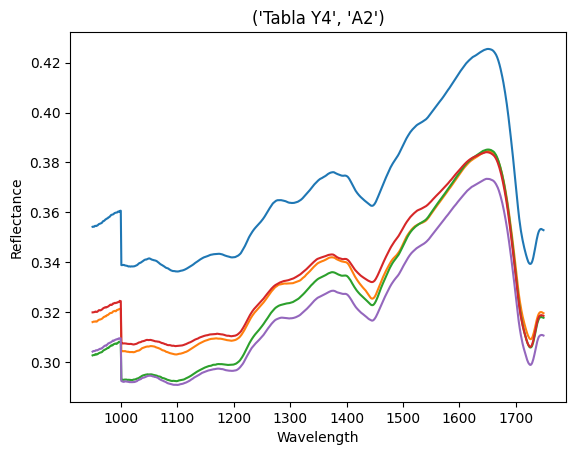

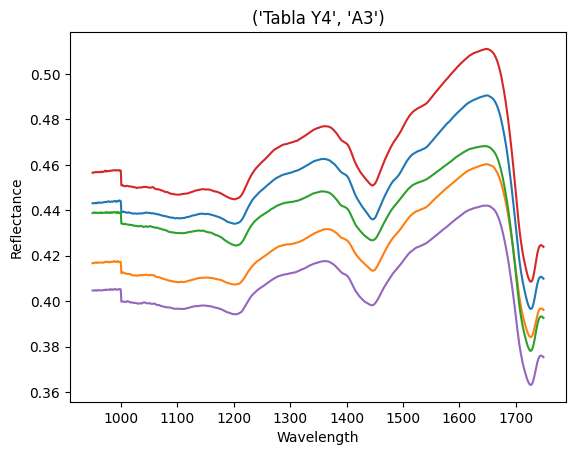

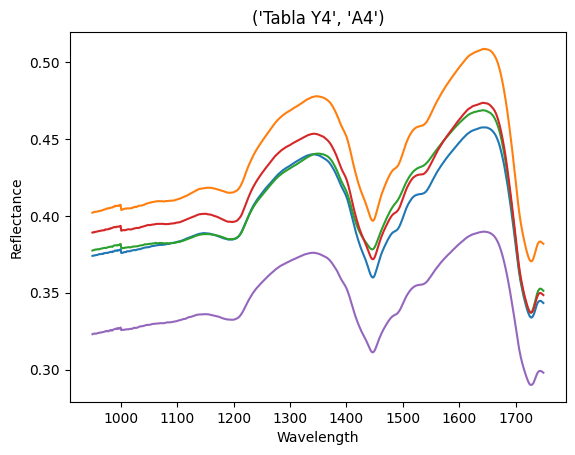

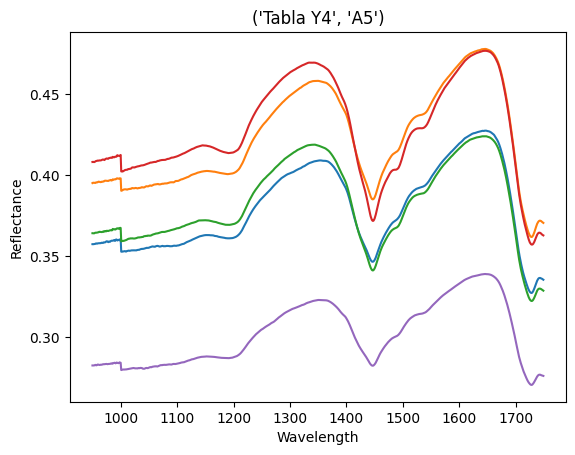

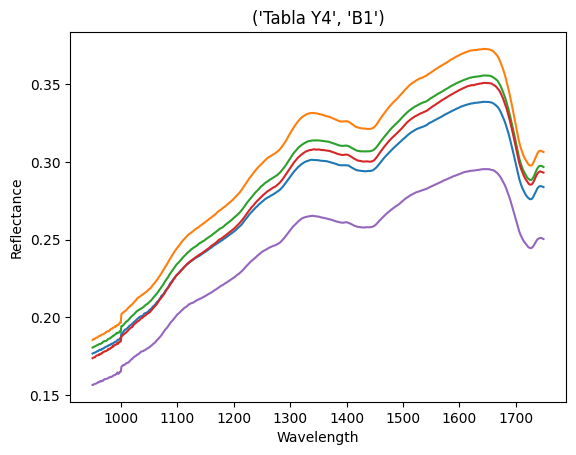

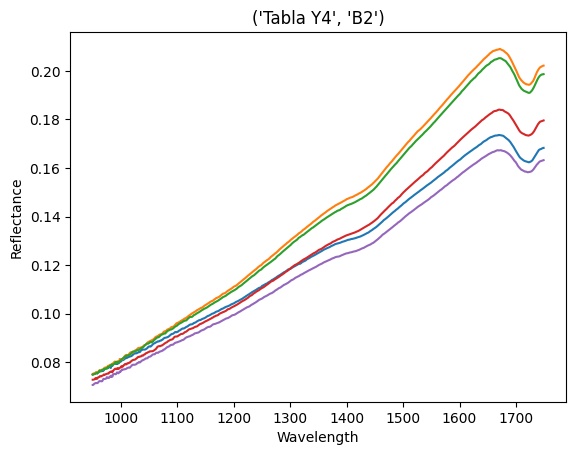

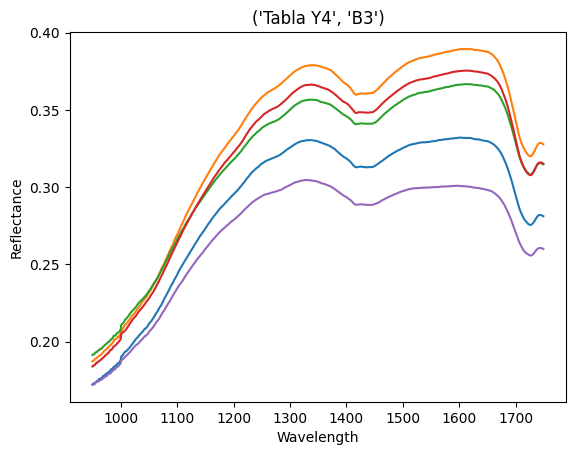

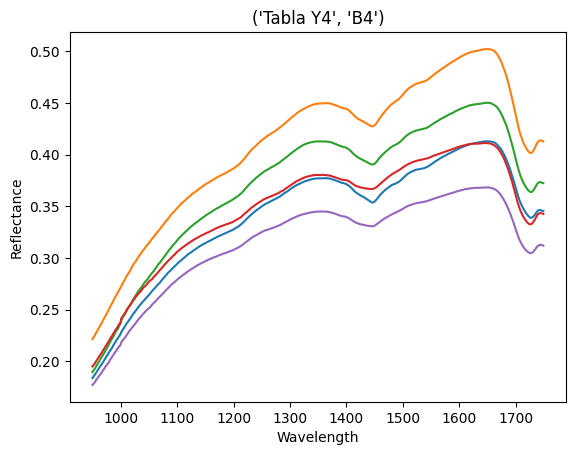

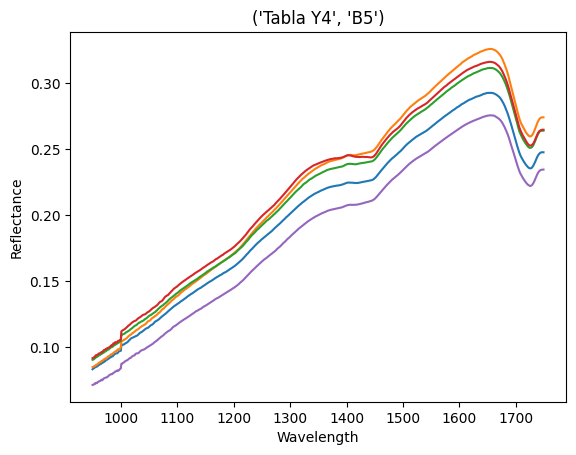

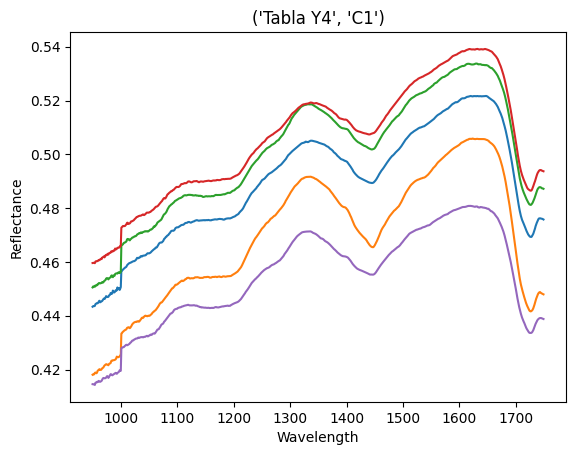

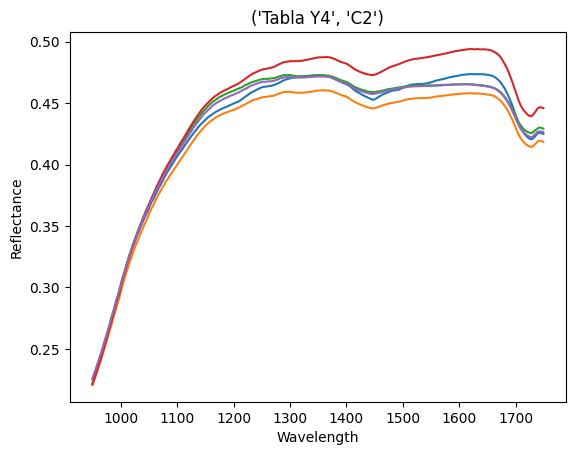

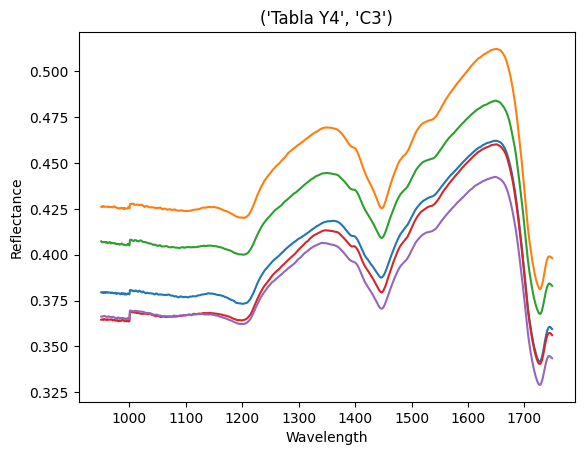

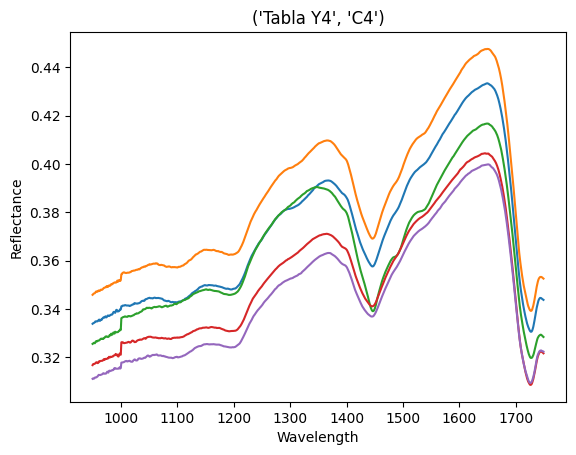

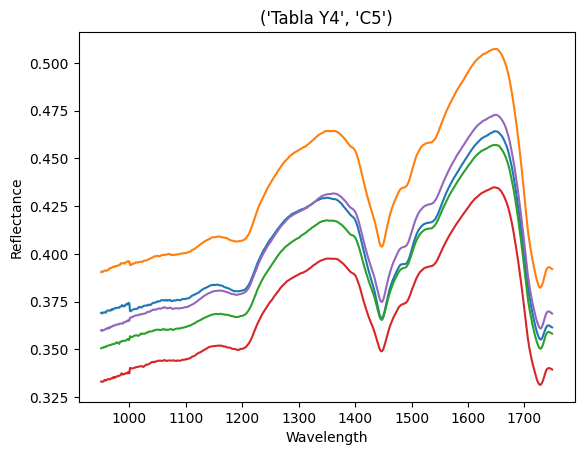

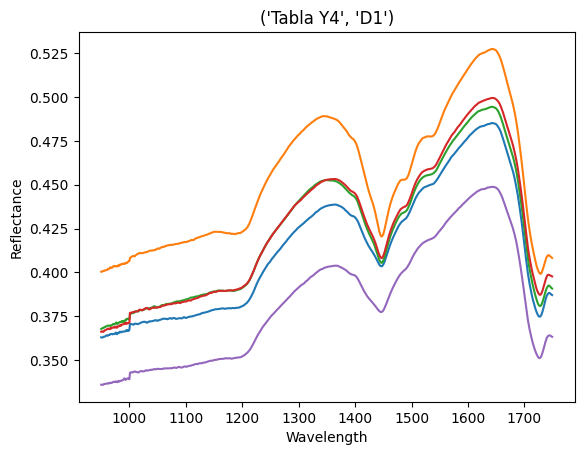

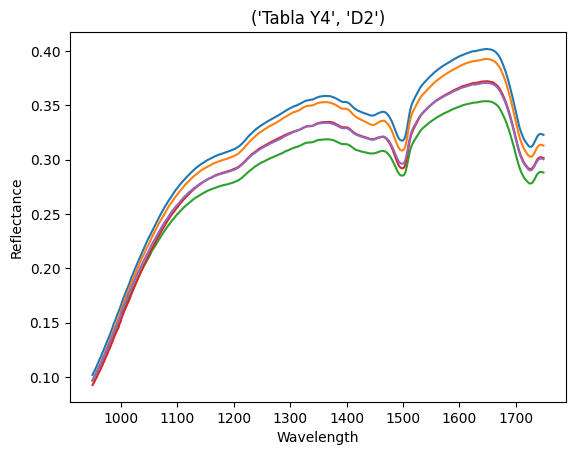

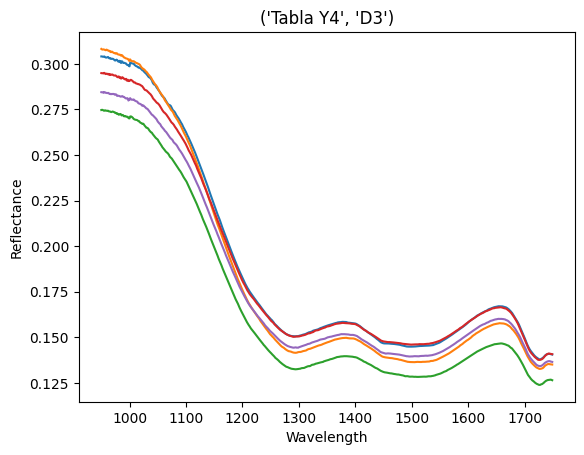

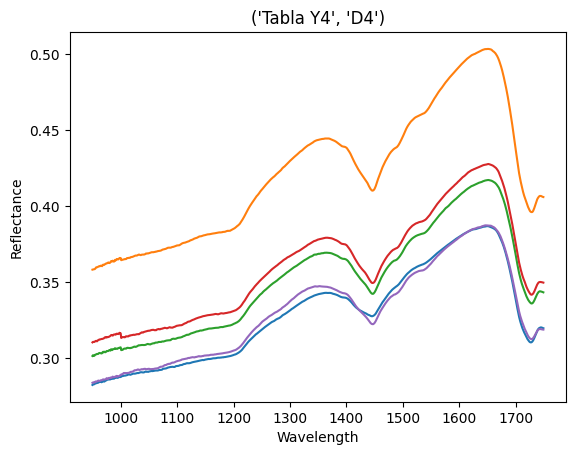

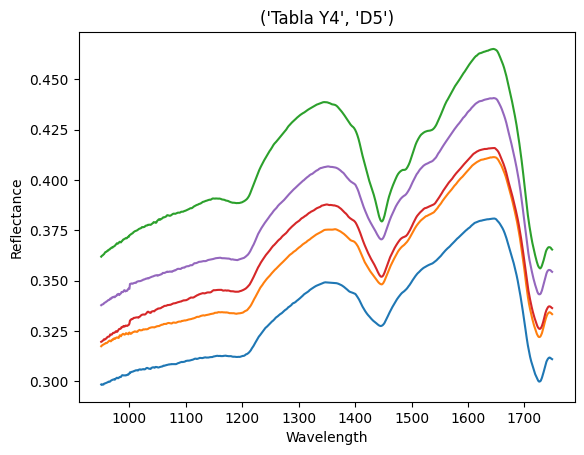

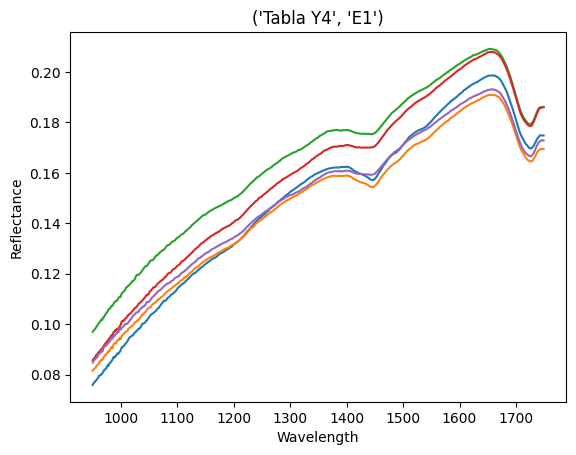

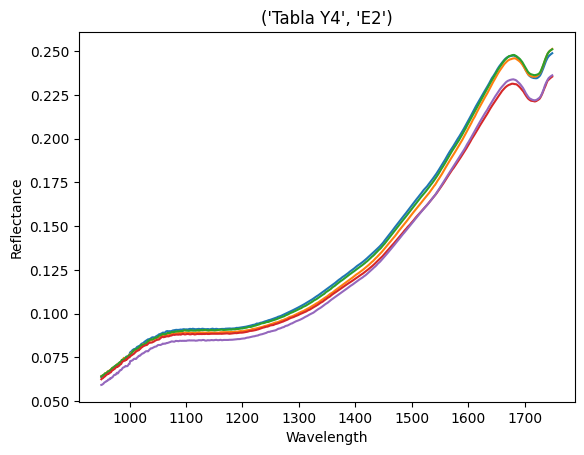

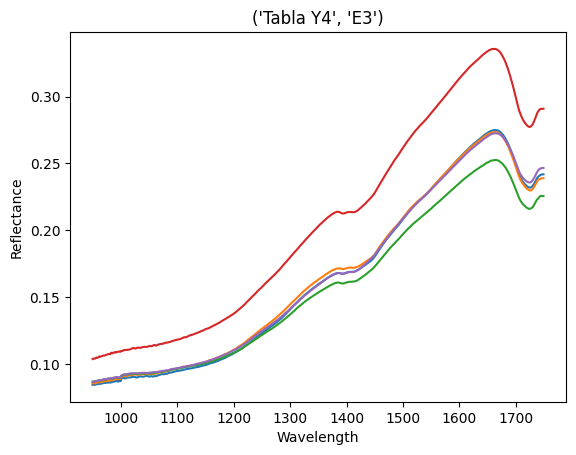

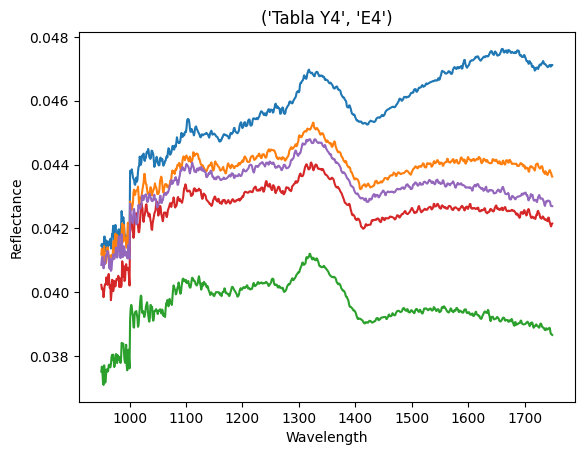

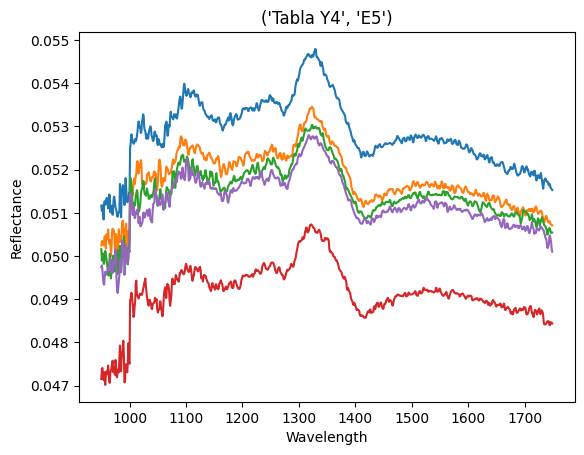

In [42]:
cont = 0
aux = 0

for f in specs_df:
    dev_x = f['x'].to_numpy()[600:1400]
    dev_y = f['y'].to_numpy()[600:1400]
    plt.plot(dev_x, dev_y)
    aux+=1
    if aux == 5:
        aux=0
        plt.xlabel('Wavelength')
        plt.ylabel('Reflectance')
        t = "Tabla Y4",etiquetas[cont]
        plt.title(t)
        plt.show()
        cont+=1

In [ ]:
def imprime_todos():
    for f in specs_df:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        print(dev_y)
        plt.ylabel('Reflectance')
        plt.xlabel('Wavelength')
        t = "Tabla Y4"#,etiquetas[cont]
        plt.plot(dev_x, dev_y)
        plt.title(t)
        plt.show()
      
        cont+=1

# Bayes ingenuo

In [4]:
temp_f=features
# Función auxiliar  Cuenta las diferencias entre dos listas y 
# muestra el índice donde son diferentes.
def show_differences(list1, list2):
  differences = {}
  for i in range(len(list1)):
    if list1[i] != list2[i]:
      differences[i] = [list1[i], list2[i]]
  return differences
features=temp_f

In [43]:
#feature_names = data['feature_names']
feature_names = ['wavelength','reflectance']
lista = [i for i in range(25) for _ in range(5)]


labels = np.concatenate((lista, lista))
features=np.concatenate((features, features))

#print(labels)
#labels = np.arange(125)
#temp_l=labels
#features=temp_f

#labels = list(range(125)) + list(range(125))
#features=np.concatenate((features, features))


print(len(labels))
print(len(features))

250
250


In [46]:
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 1, random_state = 22
)

#print(train)
#print(test)
#print(train_labels)
#print(test_labels)


GNBclf = GaussianNB()

model = GNBclf.fit(train, train_labels)
print(len(model.classes_))
test=features
preds = GNBclf.predict(test)
print(preds)
print(show_differences(preds, labels))
#print(GNBclf.score(test,train_labels))
print(test[0]) 

25
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23
 24 24 24 24 24  0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3
  3  4  4  4  4  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8
  8  8  9  9  9  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13
 13 13 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18
 18 18 18 18 19 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22
 23 23 23 23 23 24 24 24 24 24]
{}
[0.21712268 0.19346849 0.17890083 ... 0.21825516 0.2187082  0.21864462]


# Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train, train_labels)
pb = reg.predict(test)
print(reg.score(train, train_labels))

len(pb)
for i in range(len(pb)):
    print("Predicción en",i," es ",round(pb[i],2))

print(show_differences(preds, labels))

1.0
Predicción en 0  es  -0.0
Predicción en 1  es  0.0
Predicción en 2  es  0.0
Predicción en 3  es  -0.0
Predicción en 4  es  -0.0
Predicción en 5  es  1.0
Predicción en 6  es  1.0
Predicción en 7  es  1.0
Predicción en 8  es  1.0
Predicción en 9  es  1.0
Predicción en 10  es  2.0
Predicción en 11  es  2.0
Predicción en 12  es  2.0
Predicción en 13  es  2.0
Predicción en 14  es  2.0
Predicción en 15  es  3.0
Predicción en 16  es  3.0
Predicción en 17  es  3.0
Predicción en 18  es  3.0
Predicción en 19  es  3.0
Predicción en 20  es  4.0
Predicción en 21  es  4.0
Predicción en 22  es  4.0
Predicción en 23  es  4.0
Predicción en 24  es  4.0
Predicción en 25  es  5.0
Predicción en 26  es  5.0
Predicción en 27  es  5.0
Predicción en 28  es  5.0
Predicción en 29  es  5.0
Predicción en 30  es  6.0
Predicción en 31  es  6.0
Predicción en 32  es  6.0
Predicción en 33  es  6.0
Predicción en 34  es  6.0
Predicción en 35  es  7.0
Predicción en 36  es  7.0
Predicción en 37  es  7.0
Predicción en 3

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=4000)
#make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(train, train_labels)
print(clf.score(train, train_labels))
print(clf.predict_proba(test))
print(clf.predict(test))

print(show_differences(preds, labels))

1.0
[[7.48656368e-01 1.11209141e-02 5.87962180e-04 ... 7.00367309e-04
  2.86027218e-10 2.24226727e-07]
 [6.00754750e-01 2.73674231e-02 4.16047768e-04 ... 2.56473733e-03
  5.09496658e-09 2.97425400e-06]
 [7.95416570e-01 7.26009154e-03 5.38471951e-04 ... 4.73494052e-04
  1.09586295e-10 8.83935069e-08]
 ...
 [1.18375333e-10 5.84295836e-07 5.89414850e-16 ... 2.39733284e-04
  4.23395141e-01 5.19960691e-01]
 [8.62469702e-11 4.26856482e-07 3.77908851e-16 ... 2.11012845e-04
  4.44084950e-01 5.03661753e-01]
 [1.12443041e-10 5.62558275e-07 5.60855771e-16 ... 2.29564874e-04
  4.24503310e-01 5.19891389e-01]]
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23
 24 24 24 24 24  0  0  0  0  0 

# Perceptron

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train, train_labels)
Perceptron()
clf.score(train, train_labels)
clf.predict(train)

print(show_differences(preds, labels))

{}
